<center> 

## Sentiment Analysis and Text Modeling

</center>

## Descriptive Statistics

In [1]:
# import neccessary python liberaries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/Kiffya_10_acc/Nova-Financial-Solutions/')
from scripts.text_analysis import TextAnalysis

In [2]:

# file path
file_path='../data/raw_analyst_ratings.csv'
# create an object
ta=TextAnalysis(file_path)

In [3]:
ta.load_data()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [4]:
# Drop column name "Unnamed" because it is an index column
ta.drop_unnamed_column()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


#### Headline Length

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


<Axes: xlabel='headline_length', ylabel='Count'>

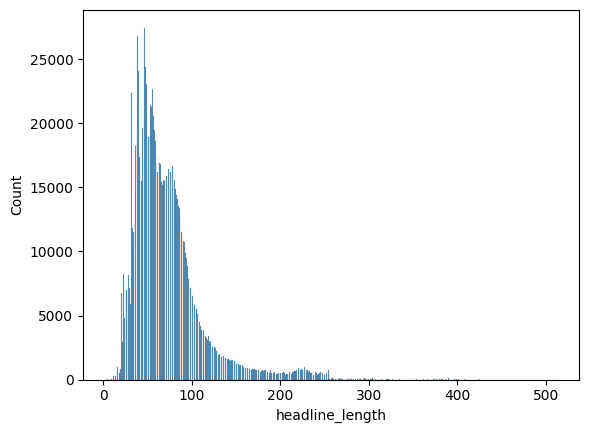

In [39]:
import seaborn as sns
df['headline_length']=df['headline'].apply(len)
print(df['headline_length'].describe())
sns.histplot(df['headline_length'])

#### Number of Articles per publisher 

In [25]:
publisher_count=df['publisher'].value_counts().to_frame().reset_index()
publisher_count.columns=['publisher','count']

publisher_count

,publisher,count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
...,...,...
1029,MoneyGeek,1
1030,muathe,1
1031,Robert Morris,1
1032,LeftCoastHedgie,1


#### Publication Dates Analysis

In [40]:
df['date'] = pd.to_datetime(df['date'],format='mixed')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

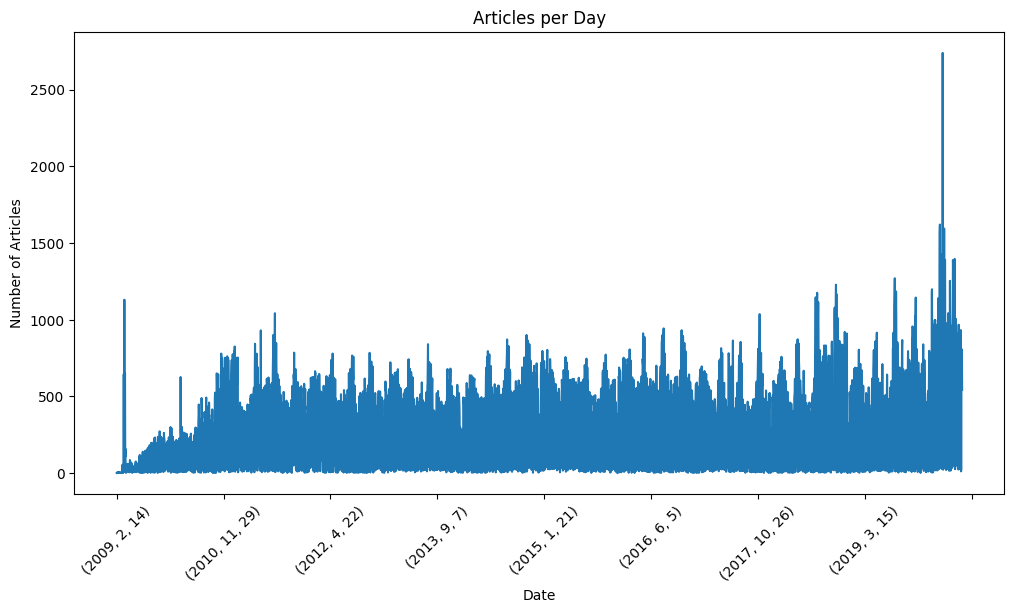

In [41]:
articles_per_day = df.groupby(['year', 'month', 'day']).size()
plt.figure(figsize=(12, 6))
articles_per_day.plot()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Articles per Day')
plt.show()

## Text Analysis
### a. Sentiment Analysis

In [28]:
from textblob import TextBlob
df['sentiment']=df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['setimern_catagory']=df['sentiment'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,year,month,day,sentiment,setimern_catagory
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020,6,5,0.0,neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020,6,3,0.0,neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020,5,26,0.0,neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020,5,22,0.0,neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020,5,22,0.0,neutral


<Axes: xlabel='setimern_catagory'>

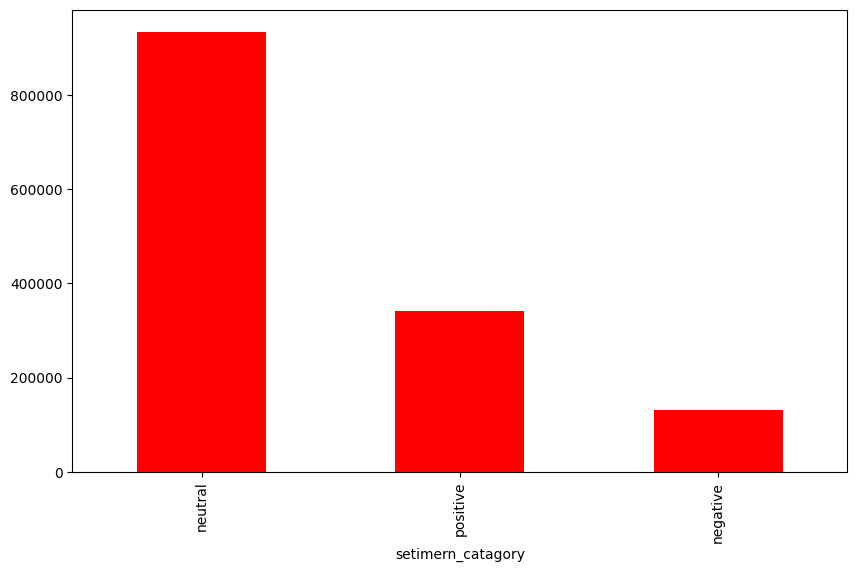

In [30]:
df['setimern_catagory'].value_counts().plot(kind='bar',figsize=(10,6),color='r')

## Time Series Analysis
### a. Publication Frequency Over Time

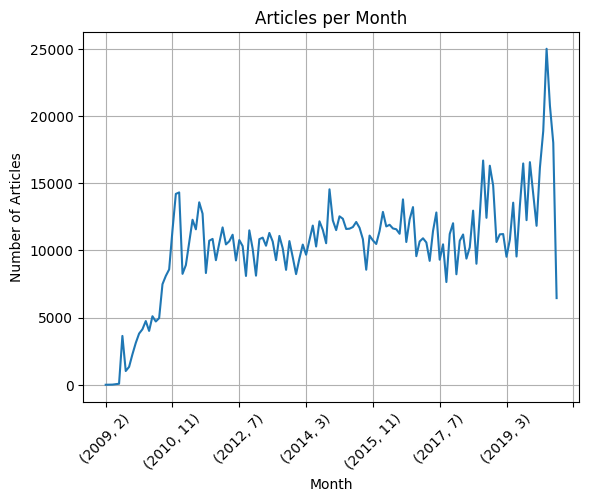

In [32]:
articles_per_month = df.groupby(['year', 'month']).size()
articles_per_month.plot()
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Articles per Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### ** Unique Domains from Email Addresses

In [33]:
print(df['publisher'].value_counts())

# Unique Domains from Email Addresses
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else None)
print(df['domain'].value_counts())

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


<Axes: xlabel='domain'>

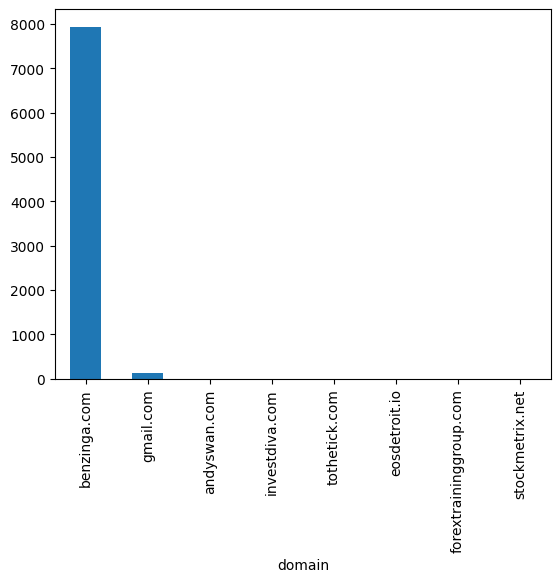

In [34]:

df['domain'].value_counts().plot(kind='bar')

<Axes: xlabel='publisher'>

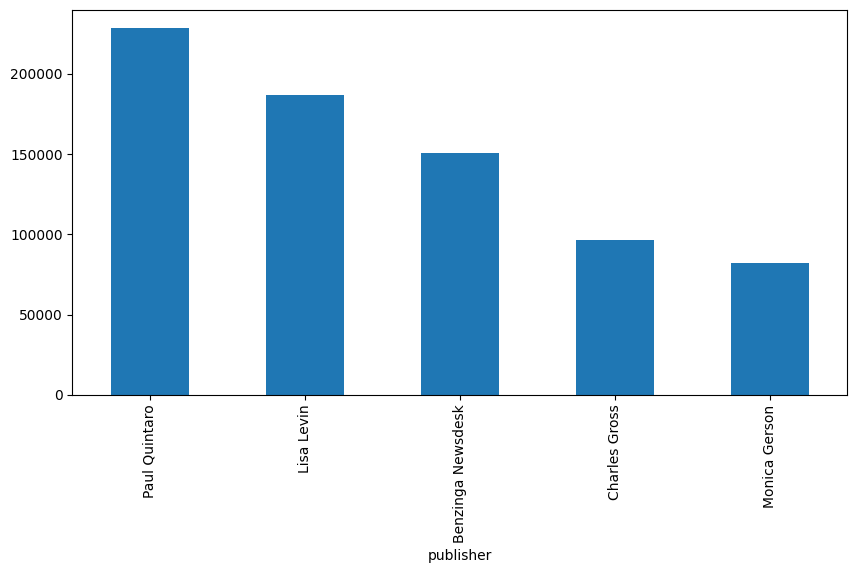

In [36]:
#Top 5 Publishers in the article
df['publisher'].value_counts().nlargest(5).plot(kind='bar', figsize=(10, 5))